# An inquiry into matplotlib's Figures 
2020-02-16
Nayef 

Reference: https://matplotlib.org/matplotblog/posts/an-inquiry-into-matplotlib-figures/

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl 

%matplotlib inline



In [11]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [12]:
plt.style.use('seaborn')

## Data 

In [13]:
xs = np.linspace(0, 2*np.pi, 400)
ys = np.sin(xs ** 2)

xc = np.linspace(0, 2*np.pi, 600)
yc = np.cos(xc ** 2)

## Goal 
Let's try to figure out what's really going on with the following standard code snippet. 

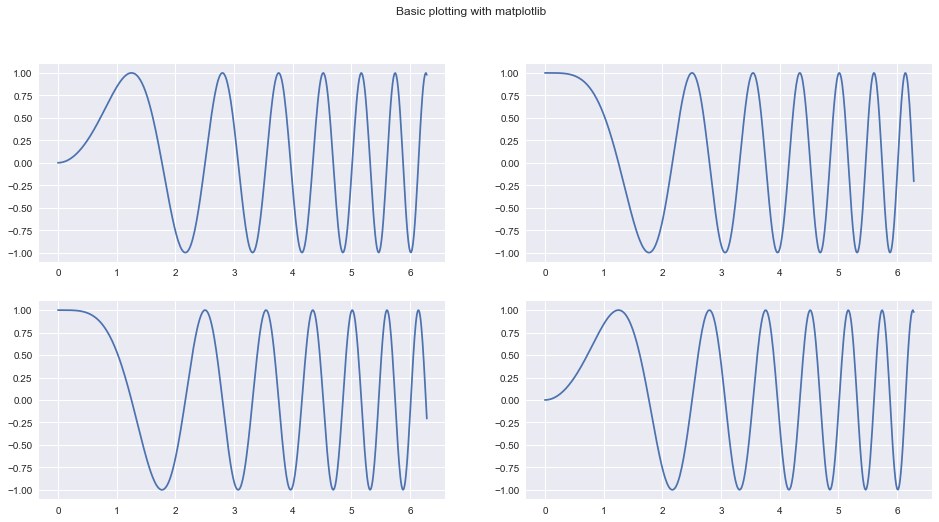

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

ax[0, 0].plot(xs, ys)
ax[1, 1].plot(xs, ys)
ax[0, 1].plot(xc, yc)
ax[1, 0].plot(xc, yc)

fig.suptitle("Basic plotting with matplotlib")
plt.show()


In order to get `plt.subplots()` to work, matplotlib uses the following other functions/classes: 

* `plt.subplot`
* `plt.figure`
* `mpl.figure.Figure`
* `mpl.figure.Figure.add_subplot`
* `mpl.gridspec.GridSpec`
* `mpl.axes.Axes` 

Let's try to see what these things do. 

A Figure in matplotlib is simply your main (imaginary) canvas. This is where you will be doing all your plotting / drawing / putting images and what not. This is the central object with which you will always be interacting. A figure has a size defined for it at the time of creation.

You can define a figure like so (both statements are equivalent):

In [15]:
fig = mpl.figure.Figure(figsize=(10,10))

# OR 

fig = plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

Notice the word imaginary above. What this means is that a Figure by itself does not have any place for you to plot. You need to attach/add an Axes to it to do any kind of plotting. You can put as many Axes objects as you want inside of any Figure you have created.

An Axes:

1. Has a space (like a blank Page) where you can draw/plot data.
2. A parent `Figure`
3. Has properties stating where it will be placed inside it's parent `Figure`.
4. Has methods to draw/plot different kinds of data in different ways and add custom styles.

You can create an Axes like so (both statements are equivalent):

In [16]:
ax1 = mpl.axes.Axes(fig=fig, rect=[0,0,0.8,0.8], facecolor='red')
#OR

ax1 = plt.Axes(fig=fig, rect=[0,0,0.8,0.8], facecolor='red')

The first parameter fig is simply a pointer to the parent Figure to which an Axes will belong. The second parameter rect has four numbers : [left_position, bottom_position, height, width] to define the position of the Axes inside the Figure and the height and width with respect to the Figure. All these numbers are expressed in percentages.

A Figure simply holds a given number of Axes at any point of time

## Recreating plt.subplots with basic matplotlib functionality

We will try and recreate the below plot using Matplotlib primitives as a way to understand them better. 


Text(0.5,0.98,'2x2 Grid')

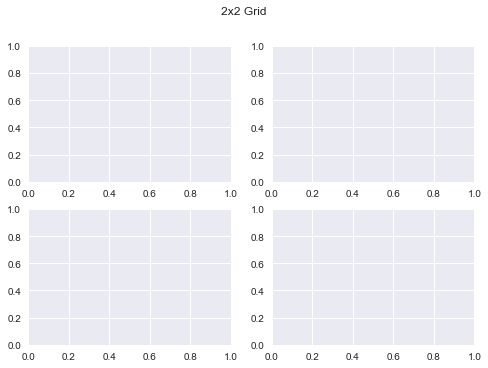

In [17]:
fig, ax = plt.subplots(2, 2)
fig.suptitle("2x2 Grid")

# Text(0.5, 0.98, '2x2 Grid')

**Note:** even if you wanted just a single, un-facetted plot, if you wanted to unpack fig and ax in a single line, you would need to use `plt.subplots()`, not `plt.subplot()`

### Let's create our first plot using matplotlib primitives:


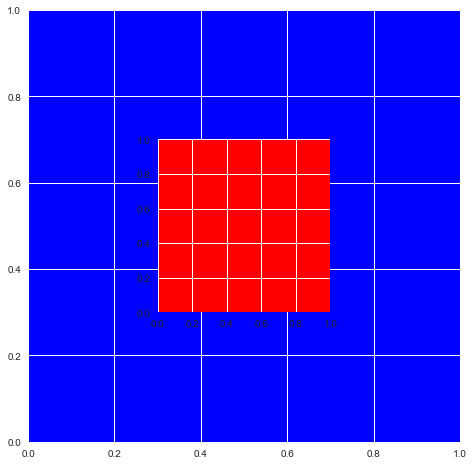

In [21]:
fig = plt.figure(figsize=(6,6))  # won't work if you use Figure()!!! 

ax1 = plt.Axes(fig=fig, rect=[0.3, 0.3, 0.4, 0.4], facecolor='red')
ax2 = plt.Axes(fig=fig, rect=[0, 0, 1, 1], facecolor='blue')

# now add the Axes to the Figure: 
fig.add_axes(ax2)
fig.add_axes(ax1)

